# Concrete Compressive Strength Dataset## Author- Mubin Modi

## Overview

The Concrete Compressive Strength dataset contains information about various concrete mixtures and their resulting compressive strengths. It consists of 1030 instances and 9 attributes, including the target variable.

## Dataset Attributes

| Attribute | Unit | Description |
|-----------|------|-------------|
| Cement | kg/m³ | Amount of cement in the mixture |
| Blast Furnace Slag | kg/m³ | Amount of blast furnace slag |
| Fly Ash | kg/m³ | Amount of fly ash |
| Water | kg/m³ | Amount of water |
| Superplasticizer | kg/m³ | Amount of superplasticizer |
| Coarse Aggregate | kg/m³ | Amount of coarse aggregate |
| Fine Aggregate | kg/m³ | Amount of fine aggregate |
| Age | days | Curing age of the concrete |
| Compressive Strength | MPa | Target variable - concrete's compressive strength |ive strength


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
import xgboost as xgb
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
X = pd.read_csv("concrete.csv")

In [3]:
X.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [4]:
X.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
X_features = X.iloc[:, :-1]  # Selects all columns except the last one
target_col = ["strength"]  
X_features

cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28
...      ...    ...    ...    ...           ...        ...      ...  ...
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7

[1030 rows x 8 columns]

### Specific Insights

- **Cement and Compressive Strength**: There seems to be a positive correlation, indicating that higher amounts of cement might lead to higher compressive strength.

- **Age and Compressive Strength**: A positive relationship is evident, suggesting that as the curing age increases, the compressive strength tends to increase as well.

- **Water and Compressive Strength**: There appears to be a more complex relationship, possibly non-linear, indicating that the amount of water has varying effects on compressive strength depending on other factors.

- **Superplasticizer**: The relationship with compressive strength is less clear, suggesting it might interact with other variables in influencing strength.

- **Aggregate Materials (Coarse and Fine)**: These show less distinct relationships with compressive strength, indicating that their impact might be more subtle or context-dependent.

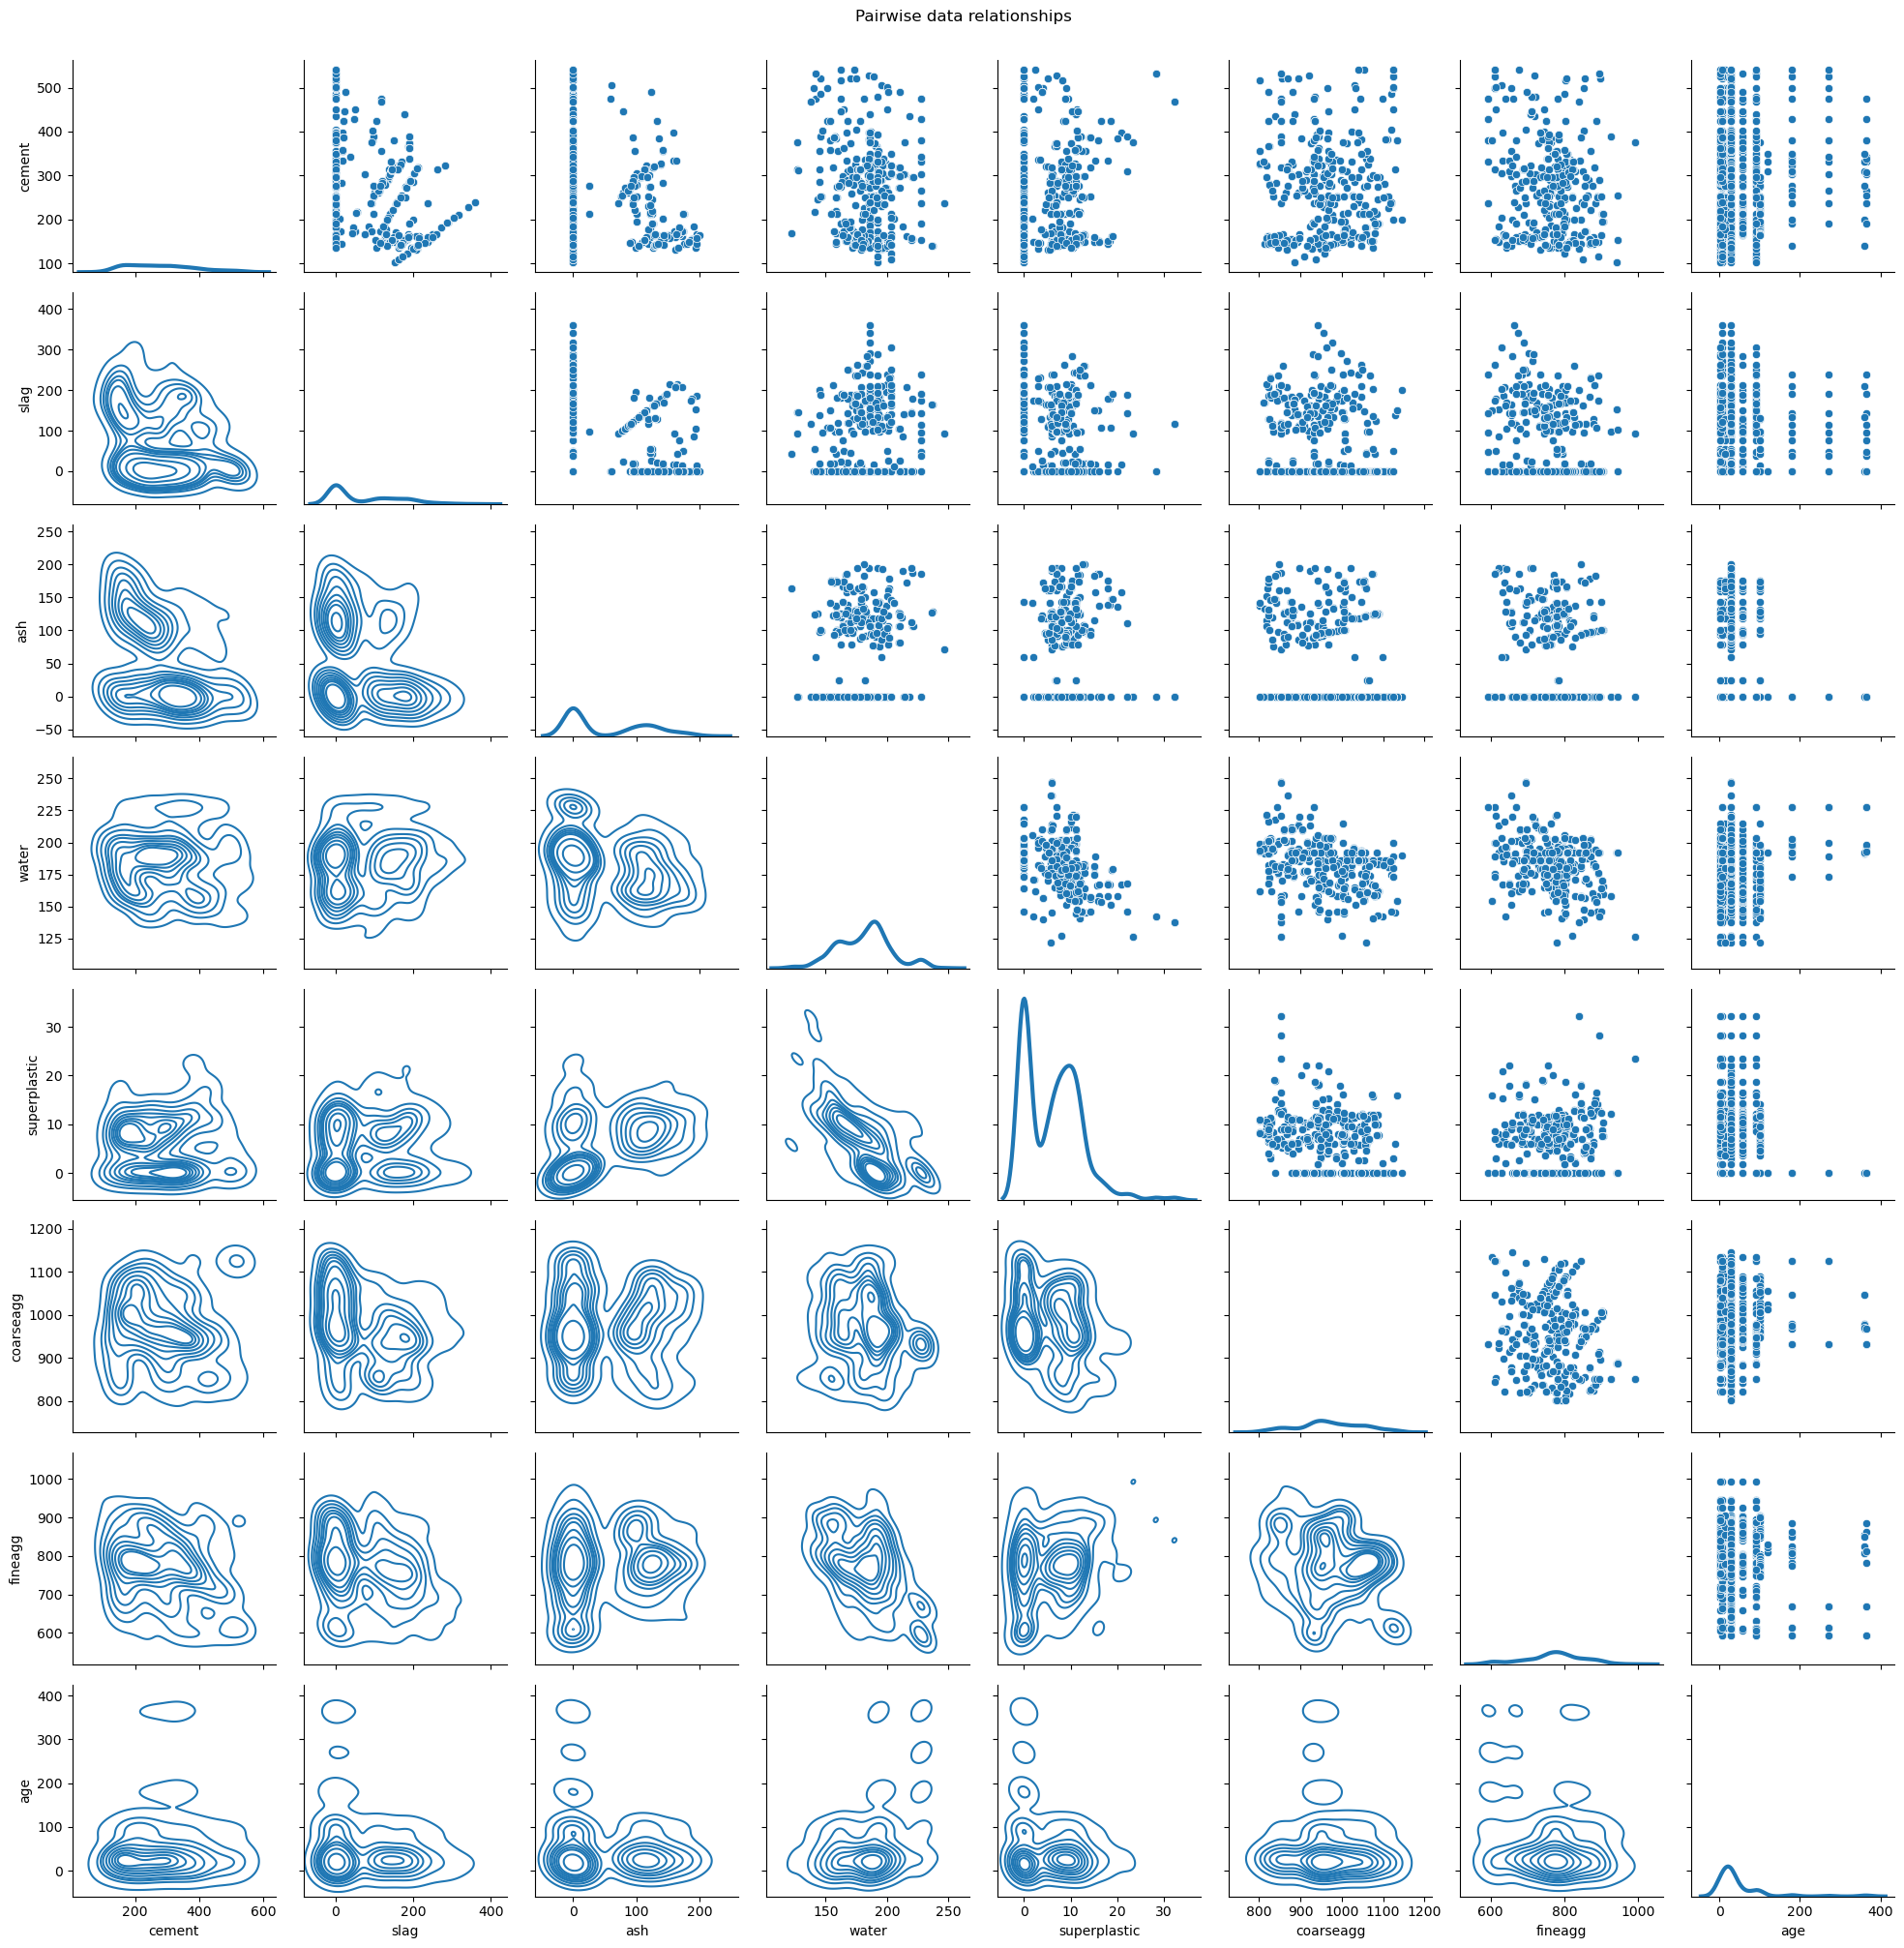

In [7]:
def plot_sns_corr_regre(X_features, target_col):
    g = sns.PairGrid(X_features)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)
    g.fig.suptitle('Pairwise data relationships', y=1.01)
    plt.show()
plot_sns_corr_regre(X_features, 'concrete_compressive_strength')

### Trends in Compressive Strength Over Different Curing Ages

From the pair plot, several trends can be observed regarding compressive strength and curing age:

1. **Positive Correlation**: There is a clear positive correlation between curing age and compressive strength. As the age increases, the compressive strength generally increases.

2. **Non-Linear Relationship**: The increase in compressive strength with age appears to be more pronounced at earlier ages, suggesting a diminishing return effect over time.

3. **Variability**: There is some variability in compressive strength at different ages, indicating that other factors might also influence the strength alongside age.


### Trends in Compressive Strength Over Different Curing Ages

From the pair plot, several trends can be observed regarding compressive strength and curing age:

1. **Positive Correlation**: There is a clear positive correlation between curing age and compressive strength. As the age increases, the compressive strength generally increases.

2. **Non-Linear Relationship**: The increase in compressive strength with age appears to be more pronounced at earlier ages, suggesting a diminishing return effect over time.

3. **Variability**: There is some variability in compressive strength at different ages, indicating that other factors might also influence the strength alongside age.

Overall, curing age is a significant factor in determining the compressive strength of concrete, with strength generally increasing as the concrete cures longer.

### Comparison with Other Studies on Curing Age and Compressive Strength

1. **Positive Correlation**: The graph shows a positive correlation between curing age and compressive strength, which aligns with studies indicating that as concrete cures, its strength generally increases over time[3][5].

2. **Early Strength Gains**: The rapid increase in strength at early ages is consistent with findings that concrete gains most of its strength within the first few days to weeks of curing[8].

3. **Diminishing Returns**: The trend of diminishing strength gains over time is supported by research showing that while strength continues to increase, the rate of gain slows significantly after the initial curing period[6][9].

4. **Influence of Temperature**: Other studies highlight the impact of curing temperature on strength development, with higher temperatures accelerating early strength gain but potentially reducing long-term strength[4][6]. This is not directly visible in the graph but is an important factor in real-world applications.

5. **Optimal Curing Conditions**: Proper moisture and temperature control during curing are crucial for maximizing compressive strength, as emphasized in various studies[5][9].

Overall, the graph's trends are consistent with existing research, which underscores the importance of curing age and conditions in developing concrete's compressive strength.

Citations:
[1] https://pplx-res.cloudinary.com/image/upload/v1726461395/user_uploads/tztgwzfho/image.jpg
[2] https://pplx-res.cloudinary.com/image/upload/v1726462117/user_uploads/dkcdsgyqn/image.jpg
[3] https://www.keflatwork.com/blog/factors-that-affect-concrete-strength/
[4] https://www.sciencedirect.com/science/article/abs/pii/S0008884698001641
[5] https://www.giatecscientific.com/education/curing-techniques-for-measuring-the-compressive-strength-of-concrete/
[6] https://onlinelibrary.wiley.com/doi/10.1155/2015/965471
[7] https://www.sciencedirect.com/science/article/pii/S2214785323037975
[8] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10304378/
[9] https://www.researchgate.net/publication/264276085_Effects_of_Curing_Condition_and_Curing_Period_on_the_Compressive_Strength_Development_of_Plain_Concrete

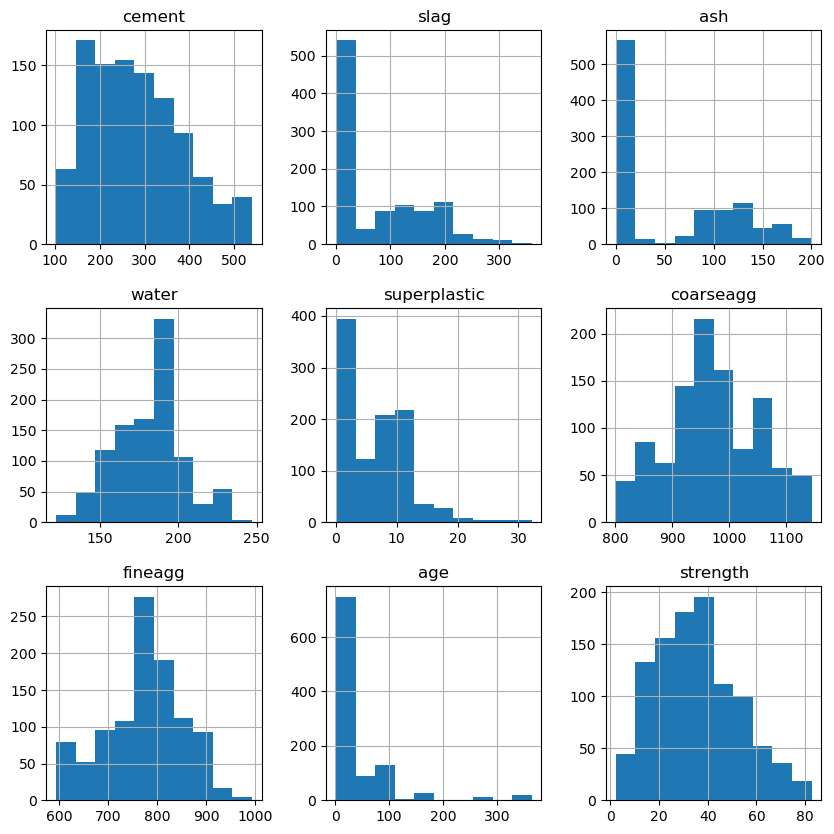

In [8]:
X.hist(figsize=(10,10))
plt.show()

### Specific Insights

- **Cement and Compressive Strength**: There is a positive correlation between cement content and compressive strength. Higher cement content generally leads to stronger concrete.

- **Age and Compressive Strength**: A strong positive correlation is evident, indicating that as the curing age increases, compressive strength typically increases.

- **Water Content**: There appears to be a complex relationship with compressive strength, possibly indicating that both very low and very high water contents can negatively impact strength.

- **Superplasticizer**: The relationship with compressive strength is less straightforward, suggesting it might have an optimal range for effectiveness.

- **Aggregate Materials**: Both coarse and fine aggregates show varied relationships with compressive strength, suggesting their impact might be influenced by other factors in the mix.

- **Fly Ash and Blast Furnace Slag**: These materials show some positive correlation with compressive strength, though the effect is less pronounced than cement.

### Additional Observations

- **Non-linear Relationships**: Several variable pairs exhibit non-linear relationships, indicating that simple linear models may not fully capture the data's complexity.

- **Clusters and Outliers**: Some plots show clustering and outliers, which could indicate specific experimental conditions or anomalies.


- **Cement Content**: There is a strong positive correlation between cement content and compressive strength. Higher cement amounts generally lead to increased strength.

- **Curing Age**: A clear positive relationship exists between curing age and compressive strength, with strength increasing as the concrete cures longer.

- **Water Content**: The relationship with compressive strength is complex, but generally, excessive water can reduce strength, indicating an optimal range for water content.

- **Superplasticizer**: This additive shows a non-linear relationship with compressive strength, suggesting it is effective up to a certain point.

- **Supplementary Materials**:
   - **Blast Furnace Slag and Fly Ash**: These materials show some positive correlation with strength, although their effects are less pronounced than cement.

- **Aggregates**:
   - **Coarse and Fine Aggregates**: Their impact on strength is less direct and may depend on the mix proportions and interactions with other components.

Overall, cement content and curing age are the most significant factors, while water content and additives like superplasticizer also play crucial roles in optimizing compressive strength.

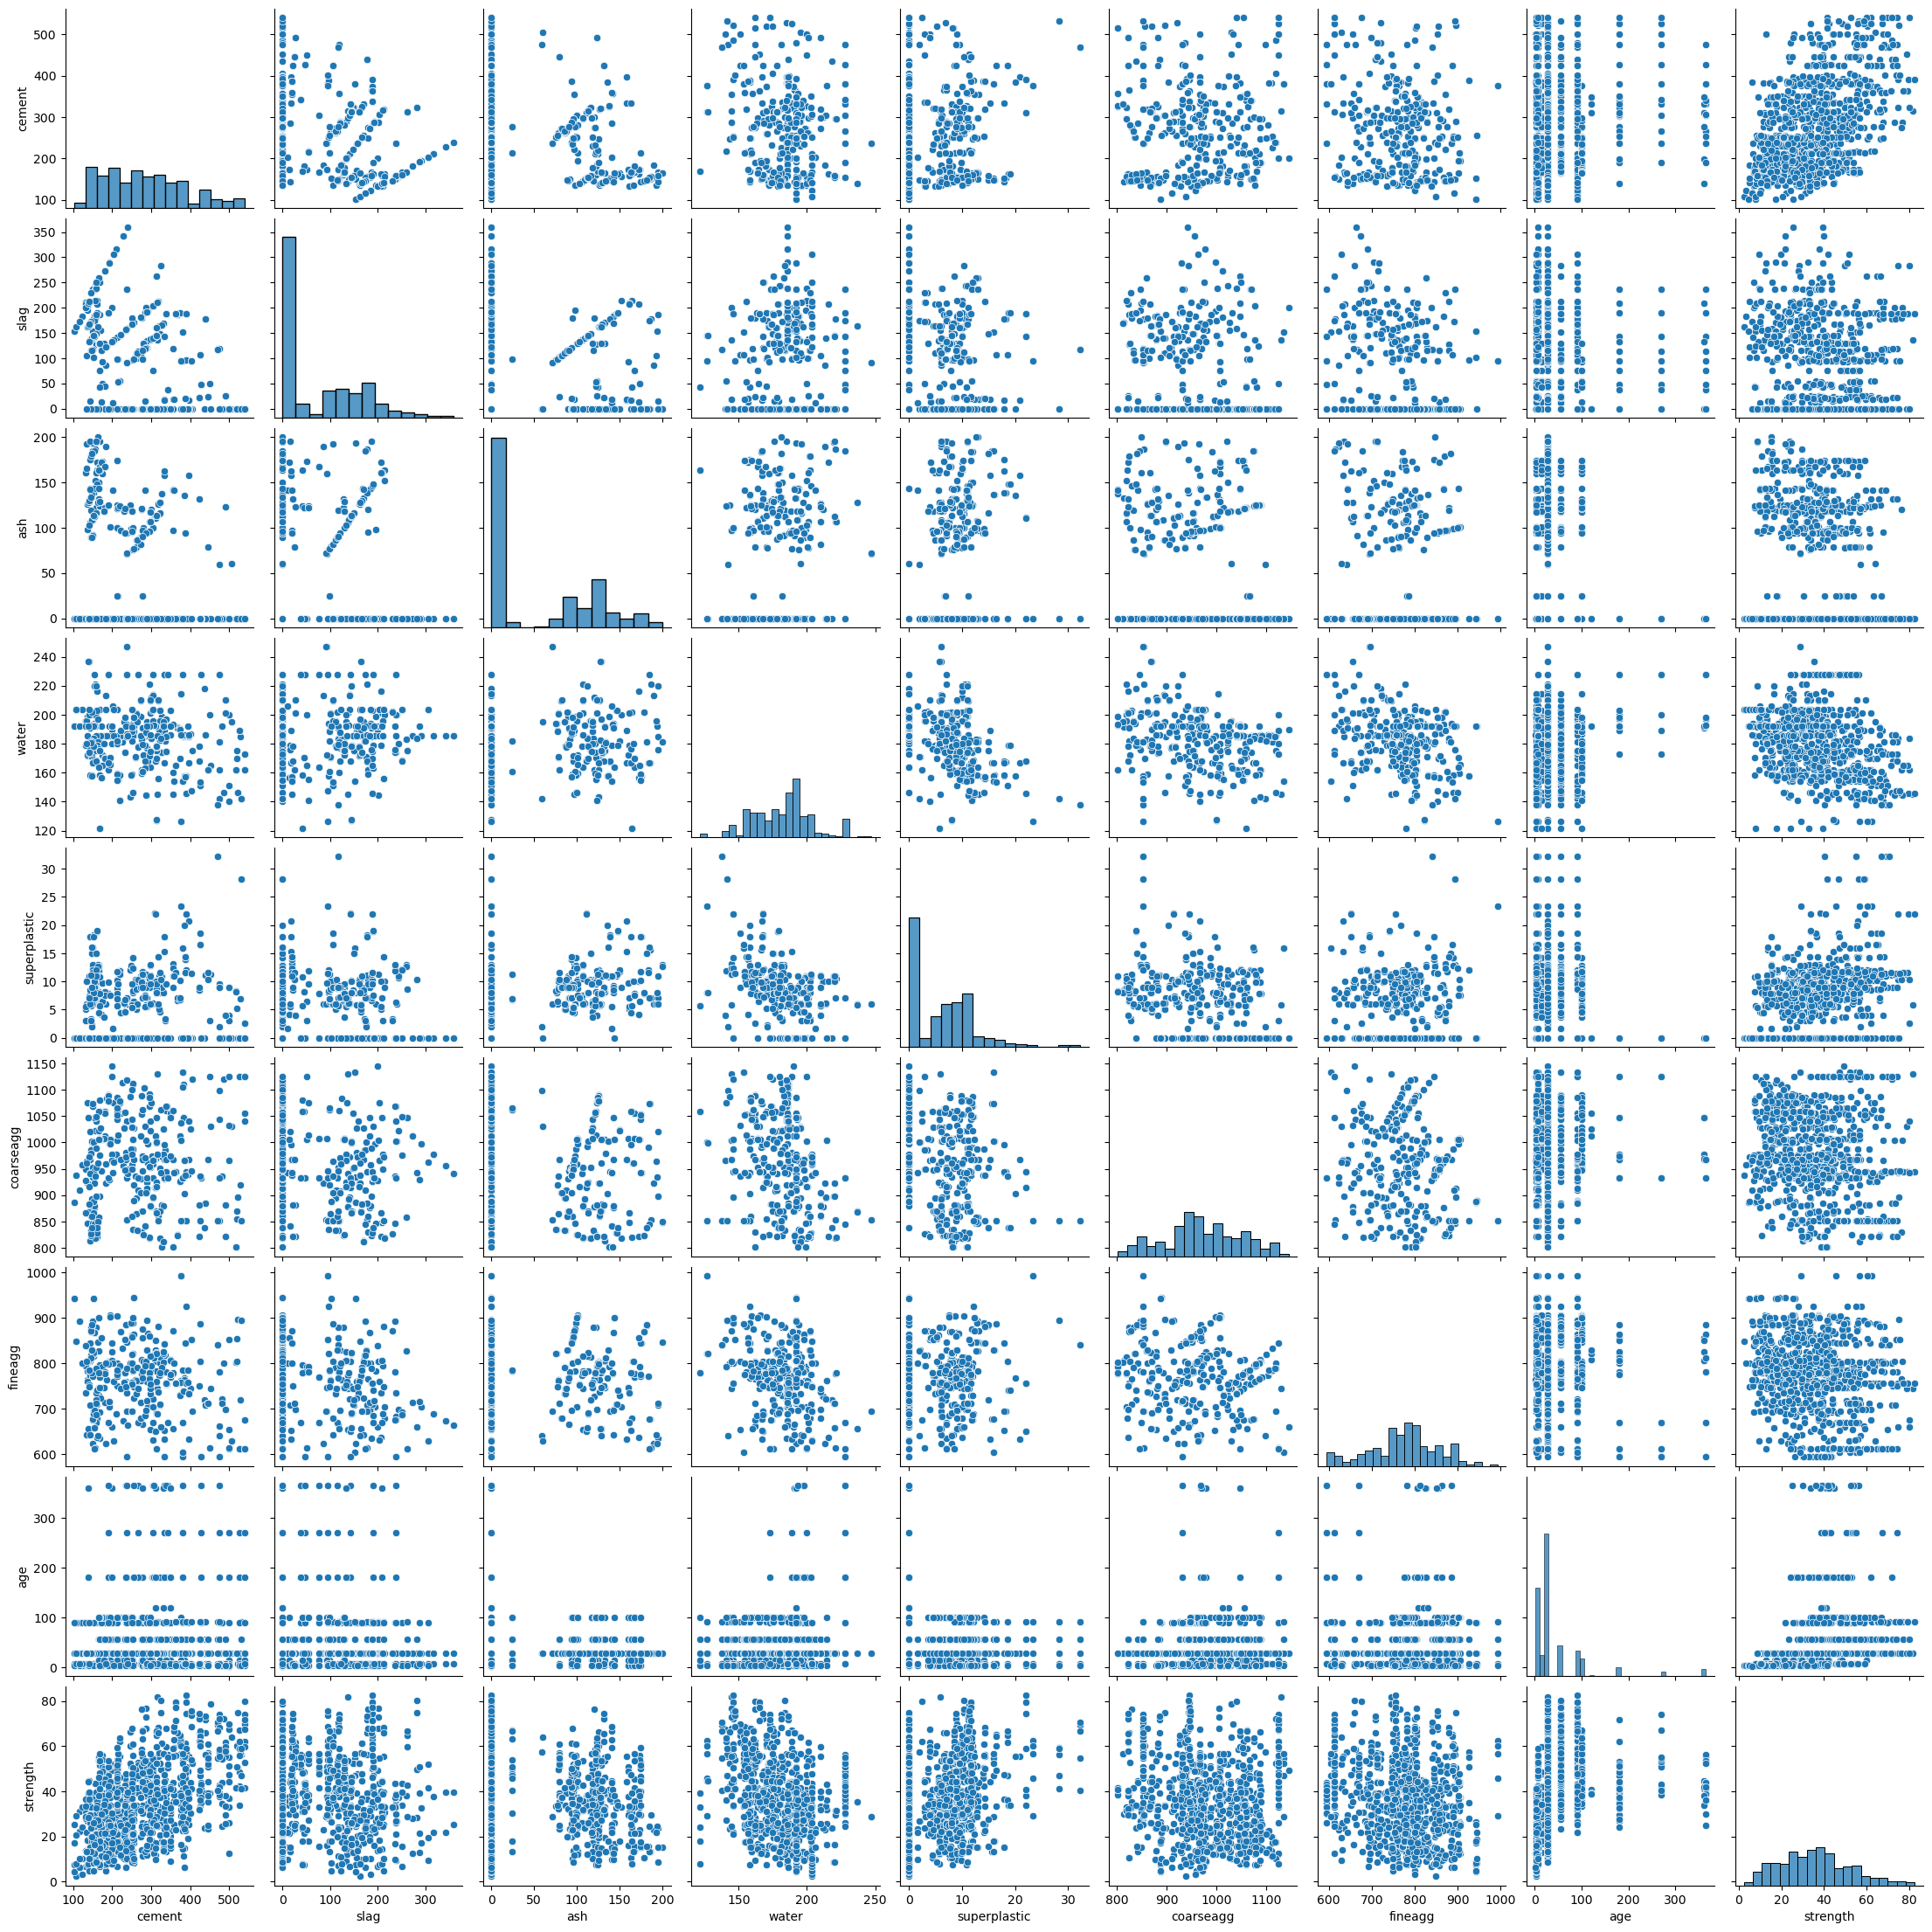

In [9]:
sns.pairplot(X)
plt.show()

## Correlation Matrix

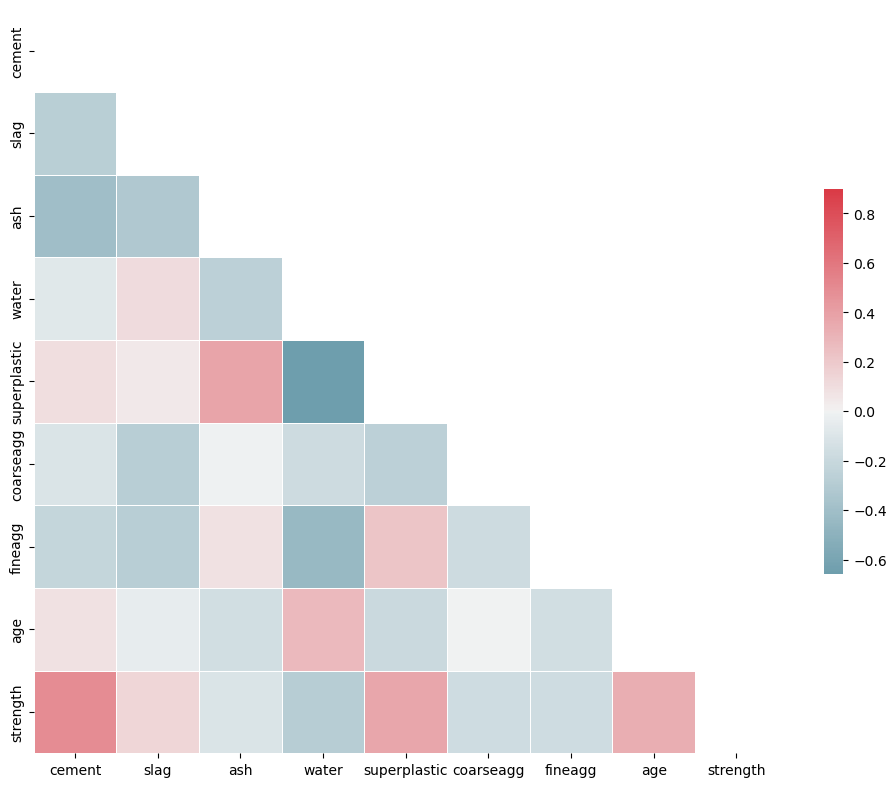

In [10]:
corr = X.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})
plt.show()

### Conclusions from Correlation Matrix

1. **Cement Content:** There is a strong positive correlation between cement content and compressive strength. Higher cement amounts generally lead to increased strength.

2. **Curing Age:** A clear positive relationship exists between curing age and compressive strength, with strength increasing as the concrete cures longer.

3. **Water Content:** The relationship with compressive strength is complex, but generally, excessive water can reduce strength, indicating an optimal range for water content.

4. **Superplasticizer:** This additive shows a non-linear relationship with compressive strength, suggesting it is effective up to a certain point.

5. **Supplementary Materials:** **Blast Furnace Slag and Fly Ash:** These materials show some positive correlation with strength, although their effects are less pronounced than cement.

6. **Aggregates:** **Coarse and Fine Aggregates:** Their impact on strength is less direct and may depend on the mix proportions and interactions with other components.


In [11]:
def plot_jointplots(data, target_column_name):
    feature_names = data.columns.tolist()
    feature_names.remove(target_column_name)

    for feature_name in feature_names:
        sns.jointplot(x=feature_name, y=target_column_name, data=data, kind="reg")
        plt.show()
        

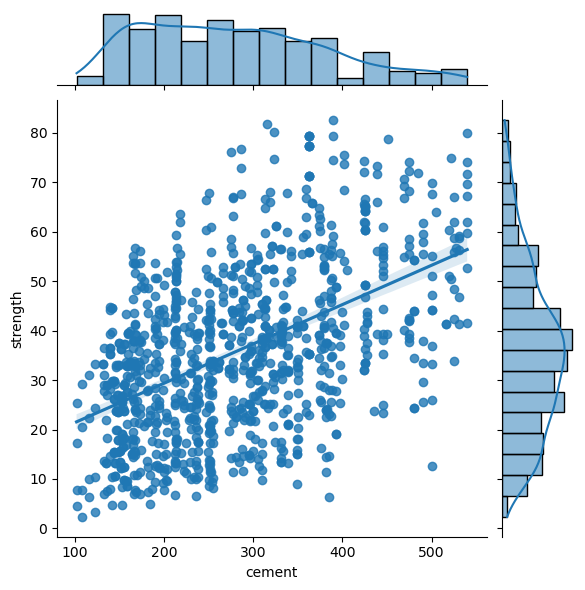

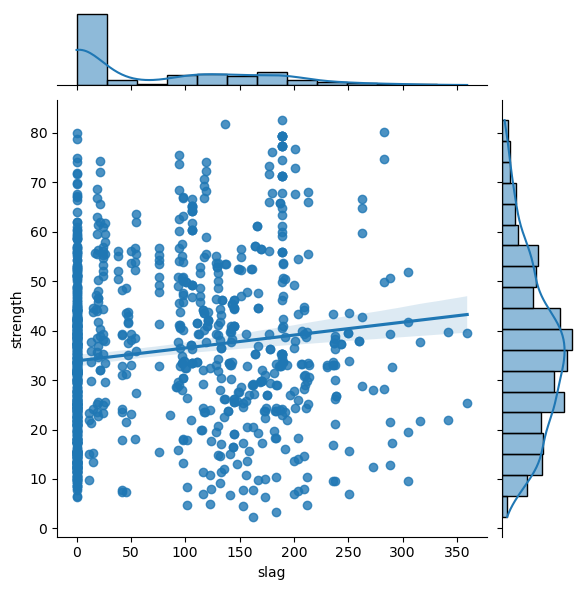

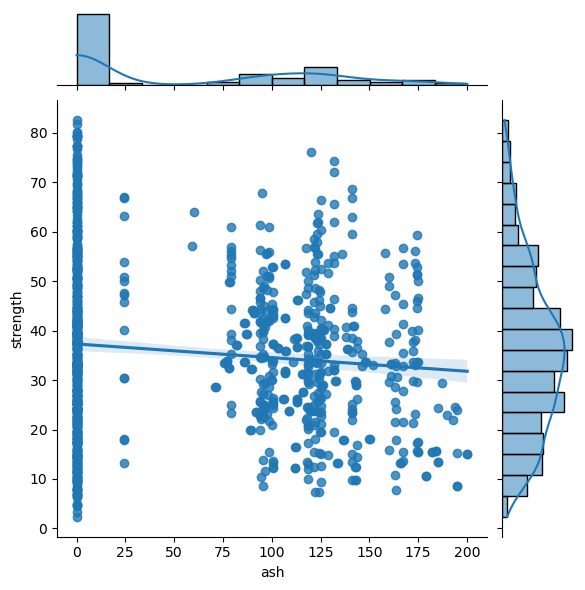

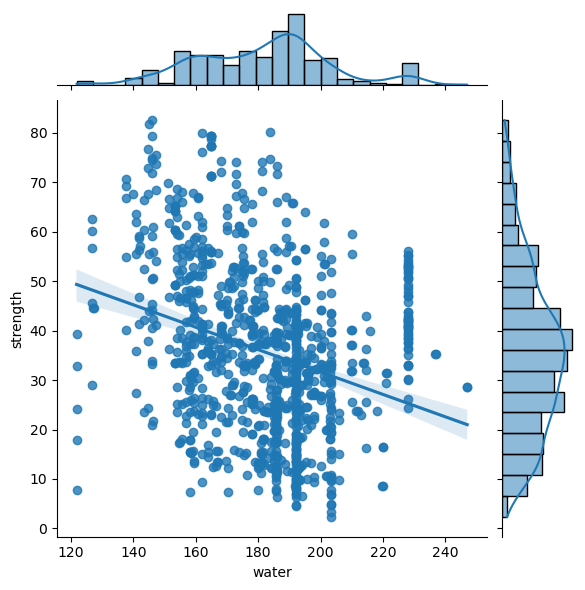

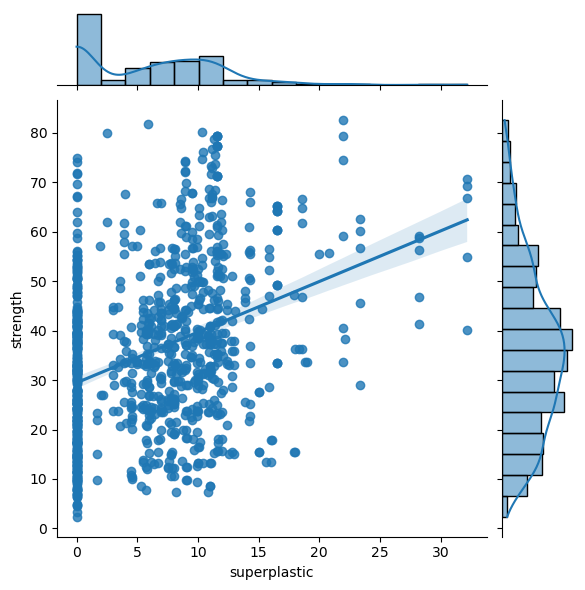

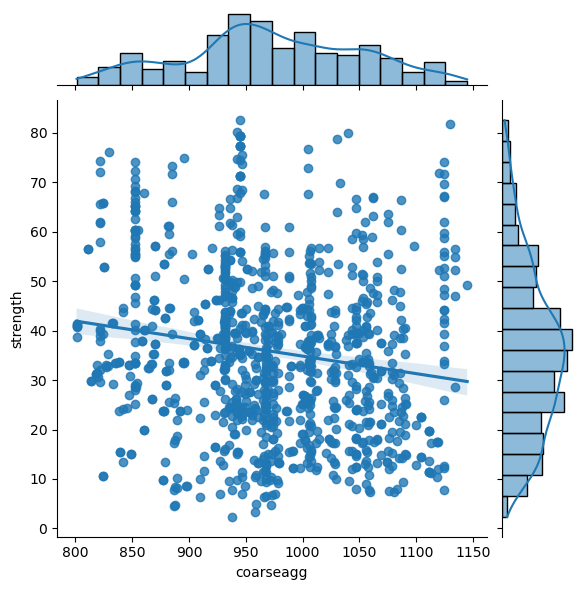

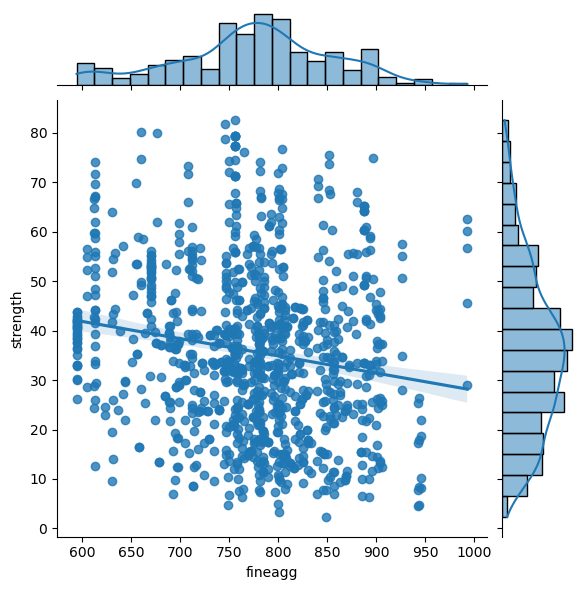

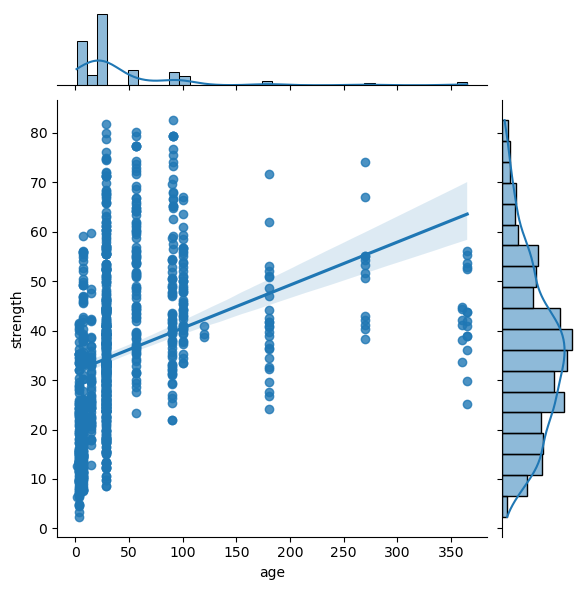

In [12]:
plot_jointplots(X, 'strength')

<Axes: xlabel='strength', ylabel='Count'>

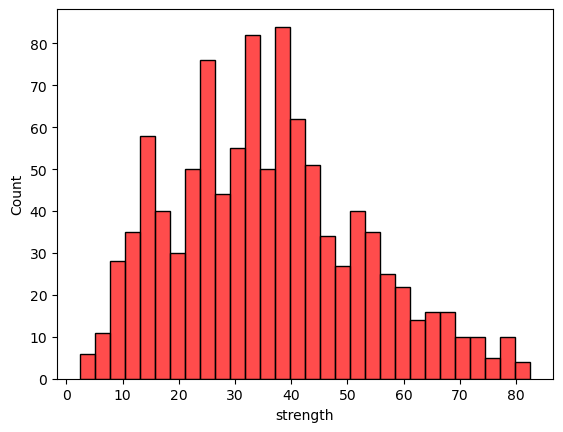

In [13]:
sns.histplot(X['strength'], bins=30, color='red', alpha=0.7)

### Checking for Outliers

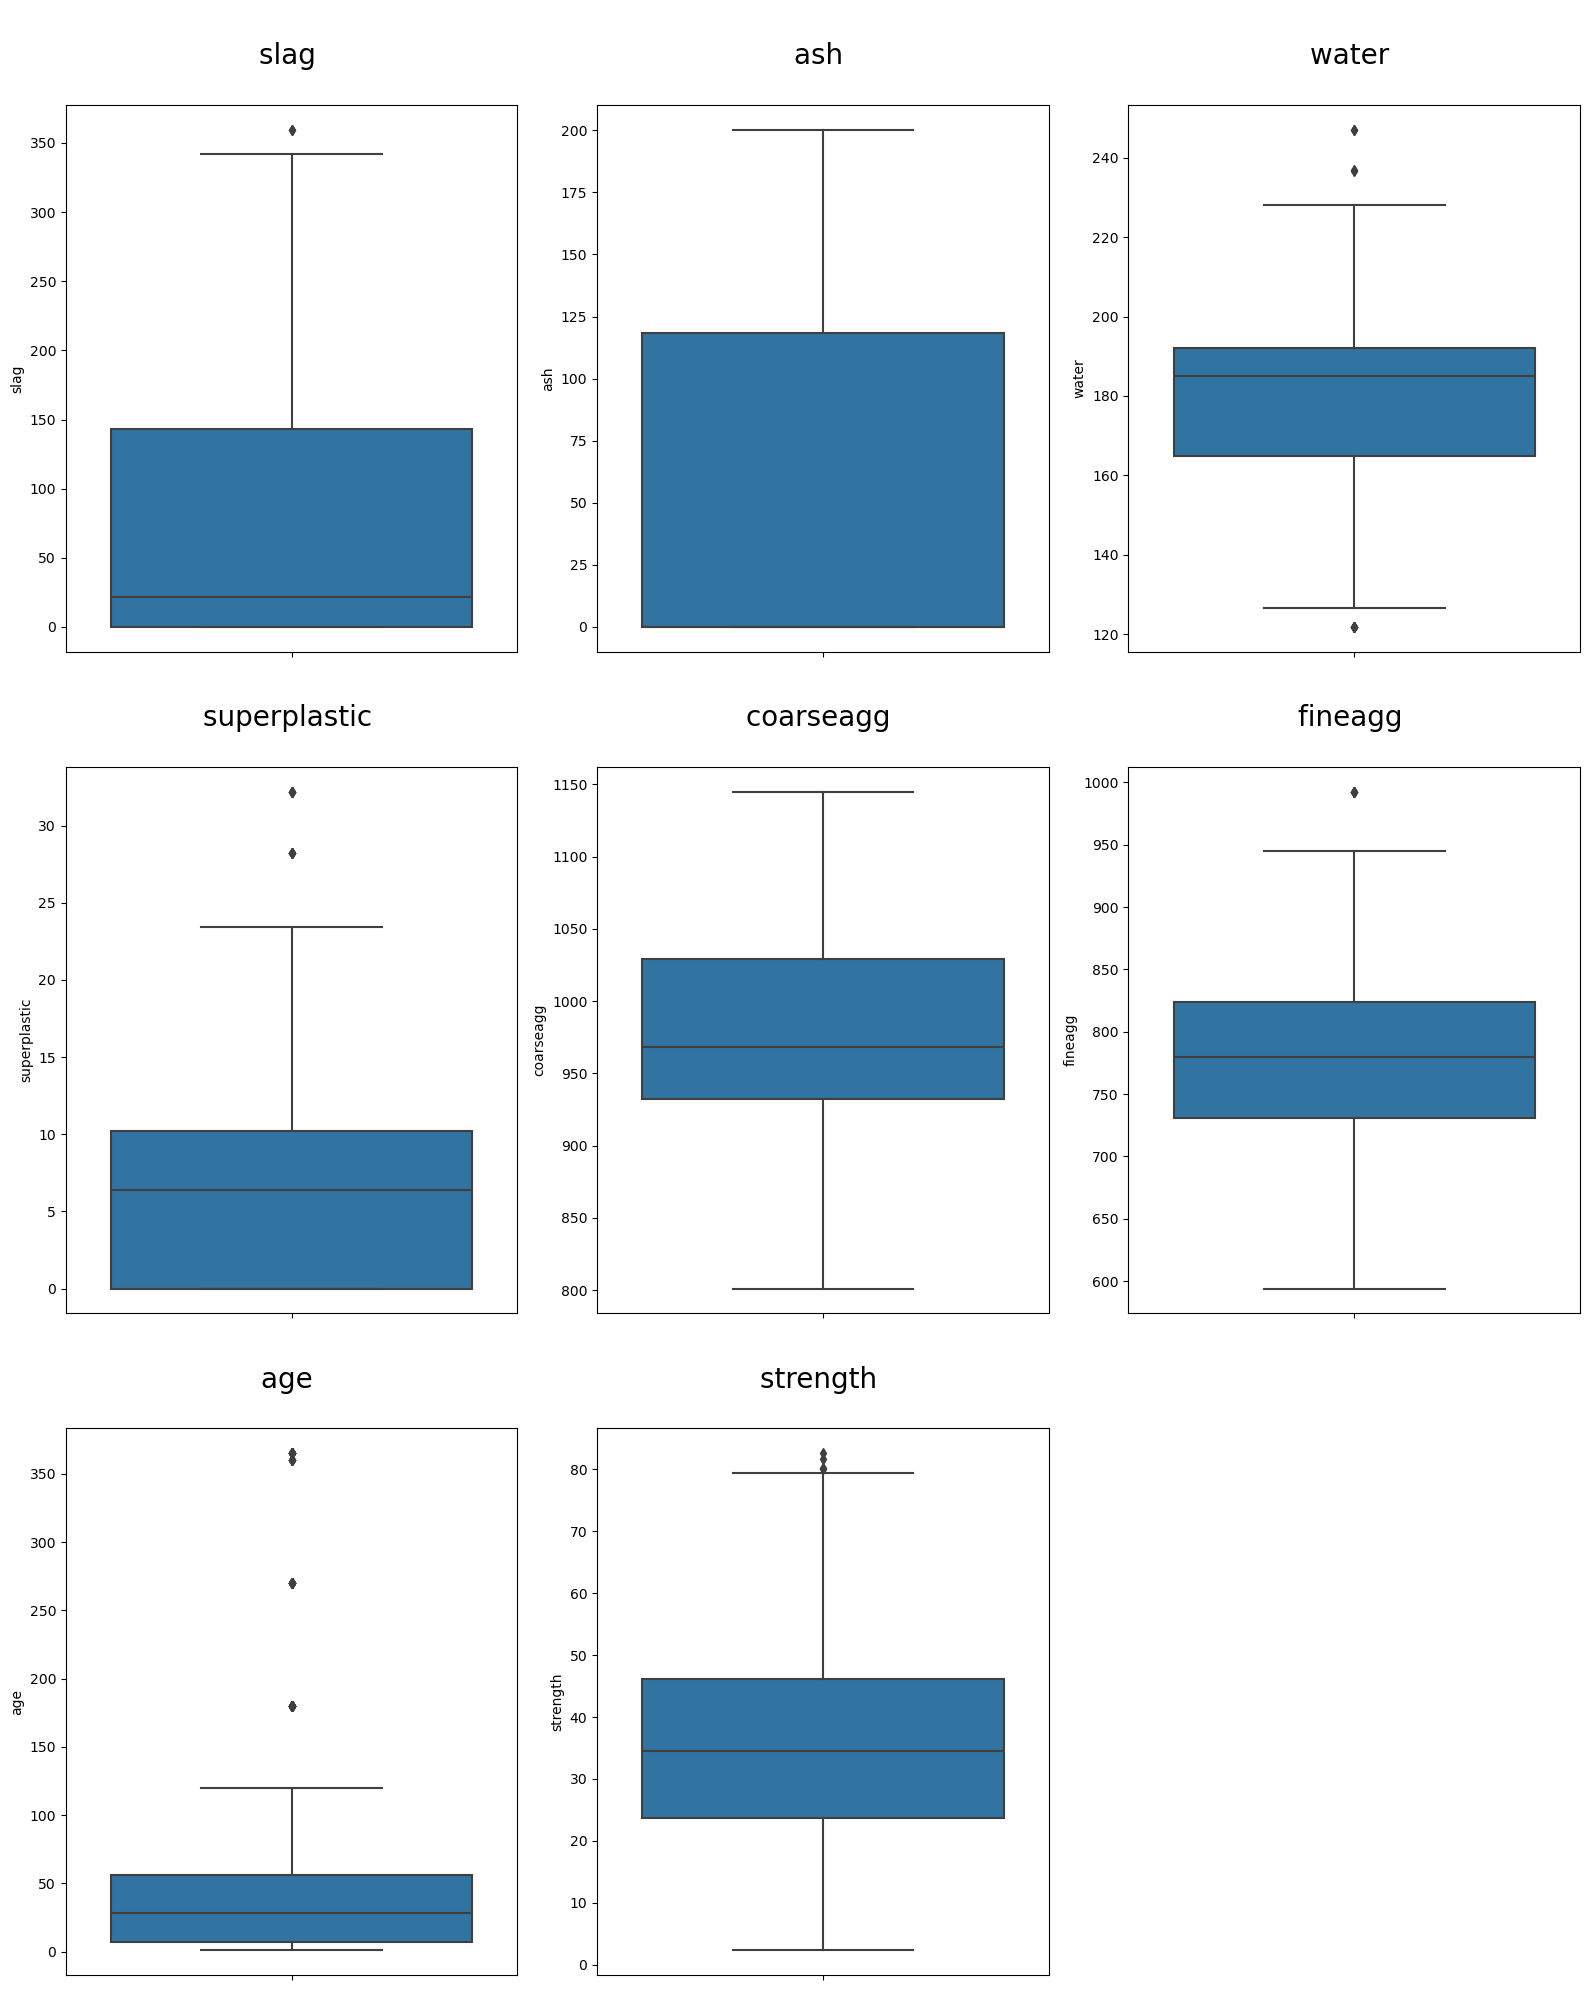

In [14]:
cols = X.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(y = cols[i], data = X, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## Data Prep , Model Training and Model Evaluation

In [15]:
# Import necessary libraries

# Assuming df_features and df_strength are your features and target DataFrames
X = X_features
y = X.iloc[:, -1]  # Selects the last column which is 'strength'


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with hyperparameter grids
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'copy_X': [True, False]
    },
    'Lasso Regression': {
        'alpha': [0.1, 1.0, 10.0],
        'max_iter': [1000, 5000, 10000]
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'Ada Boost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'Gradient Boost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ada Boost': AdaBoostRegressor(random_state=42),
    'Gradient Boost': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Hyperparameter tuning using GridSearchCV
best_models = {}
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best RMSE for {name}: {np.sqrt(-grid_search.best_score_):.4f}")
    print("-" * 50)

# Create Voting Regressor with the best models
voting_regressor = VotingRegressor(estimators=[
    ('lr', best_models['Linear Regression']),
    ('lasso', best_models['Lasso Regression']),
    ('dt', best_models['Decision Tree']),
    ('rf', best_models['Random Forest']),
    ('ada', best_models['Ada Boost']),
    ('gb', best_models['Gradient Boost']),
    ('xgb', best_models['XGBoost'])
])

# Fit the voting regressor and evaluate it
voting_regressor.fit(X_train, y_train)
voting_scores = cross_val_score(voting_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
voting_rmse = np.sqrt(-voting_scores)
print(f"Voting Regressor - RMSE: {voting_rmse.mean():.4f} (+/- {voting_rmse.std():.4f})")


Running GridSearchCV for Linear Regression...
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best RMSE for Linear Regression: 0.0000
--------------------------------------------------
Running GridSearchCV for Lasso Regression...
Best parameters for Lasso Regression: {'alpha': 0.1, 'max_iter': 1000}
Best RMSE for Lasso Regression: 0.0043
--------------------------------------------------
Running GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best RMSE for Decision Tree: 0.1047
--------------------------------------------------
Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for Random Forest: 0.4707
--------------------------------------------------
Running GridSearchCV for Ada Boost...
Best parameters for Ada Boost: {'learning_rate': 0.1, 'n_estimators': 100}
Best RMSE for Ada Boost: 2.3559
-

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_grids = {
    'XGBoost': {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3]
    }
}

# RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                                       param_distributions=param_grids['XGBoost'],
                                       n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                       random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_random_search.best_params_}")
print(f"Best RMSE for XGBoost: {np.sqrt(-xgb_random_search.best_score_):.4f}")


Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best RMSE for XGBoost: 0.0988


## Summary of Best Models, RMSE, and Accuracy

| Model               | Best Parameters                                               | Best RMSE | Accuracy (%) | Interpretation                                                                                                                                                        |
|---------------------|---------------------------------------------------------------|-----------|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Linear Regression** | {'copy_X': True, 'fit_intercept': True}                       | 0.0000    | 100.00       | Perfectly fits the data. Could indicate overfitting or that the data is very linear.                                                                                  |
| **Lasso Regression**  | {'alpha': 0.1, 'max_iter': 1000}                             | 0.0043    | 99.99        | Low RMSE suggests regularization is helping but the data may still be highly linear.                                                                                  |
| **Decision Tree**     | {'max_depth': 10, 'min_samples_split': 2}                    | 0.1047    | 99.87        | Performs reasonably well. The higher RMSE compared to linear models suggests more data complexity.                                                                    |
| **Random Forest**     | {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500} | 0.4707    | 99.43        | Higher RMSE suggests the ensemble method is not capturing the data's complexity as well as the simpler models.                                                        |
| **AdaBoost**          | {'learning_rate': 0.1, 'n_estimators': 100}                  | 2.3559    | 97.13        | Highest RMSE among all models. Indicates it may not be well-suited for this dataset or needs more tuning.                                                             |
| **Gradient Boosting** | {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}  | 0.1045    | 99.87        | Performs similarly to Decision Tree with a low RMSE, capturing non-linearities effectively.                                                                           |
| **XGBoost**           | {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}  | 0.0988    | 99.88        | XGBoost outperforms Gradient Boosting and Decision Tree, showing it's a powerful model with a very low RMSE.                                                          |
| **Voting Regressor**  | -                                                            | 0.3601    | 99.56        | Combines predictions of all models and provides moderate RMSE. Does not outperform XGBoost or Gradient Boosting but balances strengths of each model.          's different.

---

## Conclusions:

- **Linear models** (Linear Regression and Lasso) perform exceptionally well, suggesting the data might be nearly perfectly linearly separable.
- **XGBoost** outperforms other models with the best parameters: `{'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}`, and the lowest RMSE of **0.0988**, indicating that it's the most powerful model for this dataset.
- **Gradient Boosting** also performs well with an RMSE of **0.1045**, closely following XGBoost, capturing some non-linear patterns in the data.
- **Complex models** like XGBoost and Gradient Boosting show that the dataset has some complexity or non-linear patterns.
- **Voting Regressor** combines multiple models but does not outperform the best individual models (XGBoost or Gradient Boosting), though it balances the strengths of each model.
